In [1]:
from abc import ABC, abstractmethod
import itertools as itt
import os
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
alg_sels = ['WGCNA', 'CEMITOOL', 'ARACNE', 'GRNBOOST2']#, 'GENIE3']
ct_sels = ['KIRC', 'KIRP']
conf_sels = ['gender.demographic']
blocks = ['female', 'male']
fro = 0
to = 10
cwd = os.getcwd()

In [3]:
JI = pd.DataFrame(columns = ['Confounder/\nvariable', 'Cohort', 'Method', 'Block type', 'partID', 'k', 'mean JI'])
for alg_sel in alg_sels:
    for conf_sel in conf_sels:
        for ct_sel in ct_sels:
            for block in blocks:
                path = os.path.join(cwd, 'mean_JI_G_all_comparisons')
                for i in range(fro, to):
                    filename = f'g_all_conf_{i}_{str(alg_sel)}_{str(conf_sel)}_{str(ct_sel)}_{block}_jaccInd.csv'
                    try:
                        df_conf = pd.read_csv(os.path.join(path, filename), sep=',', header=0)
                        df_conf['partID'] = i
                        df_conf['Block type'] = f'confounder-based\n{block} block'
                        df_conf['Method'] = alg_sel
                        df_conf['Cohort'] = ct_sel
                        df_conf['Confounder/\nvariable'] = conf_sel
                    except:
                        continue
                    filename = f'g_all_rnd_{i}_{str(alg_sel)}_{str(conf_sel)}_{str(ct_sel)}_{block}_jaccInd.csv'
                    try:
                        df_rnd = pd.read_csv(os.path.join(path, filename), sep=',', header=0)
                        df_rnd['partID'] = i
                        df_rnd['Block type'] = f'random\n{block} block'
                        df_rnd['Method'] = alg_sel
                        df_rnd['Cohort'] = ct_sel
                        df_rnd['Confounder/\nvariable'] = conf_sel
                    except:
                        continue
                    JI = pd.concat([JI, df_conf, df_rnd])
JI.rename(columns={'mean JI': 'Mean JI'}, inplace=True)
print(JI.head())

  Confounder/\nvariable Cohort Method                      Block type partID  \
0    gender.demographic   KIRC  WGCNA  confounder-based\nfemale block      0   
1    gender.demographic   KIRC  WGCNA  confounder-based\nfemale block      0   
2    gender.demographic   KIRC  WGCNA  confounder-based\nfemale block      0   
3    gender.demographic   KIRC  WGCNA  confounder-based\nfemale block      0   
4    gender.demographic   KIRC  WGCNA  confounder-based\nfemale block      0   

     k   Mean JI  size intersection  size union               state  
0   10  0.176471                3.0        17.0  filledg_allfemale_  
1  110  0.333333               55.0       165.0  filledg_allfemale_  
2  210  0.381579              116.0       304.0  filledg_allfemale_  
3  310  0.405896              179.0       441.0  filledg_allfemale_  
4  410  0.456483              257.0       563.0  filledg_allfemale_  


In [4]:
JI['Confounder/\nvariable'] = JI['Confounder/\nvariable'].replace(['gender.demographic'], 'sex')
JI.rename(columns={'mean JI': 'Mean JI'}, inplace=True)
JI = JI.replace('ARACNE', 'ARACNe-AP').replace('CEMITOOL', 'CEMiTool').replace('GRNBOOST2', 'GRNBoost2')
JI = JI[JI['k']%100 == 10]
JI['Cohort -\nConfounder'] = JI['Cohort'] + ' - ' + JI['Confounder/\nvariable']
print(JI.head())

  Confounder/\nvariable Cohort Method                      Block type  partID  \
0                   sex   KIRC  WGCNA  confounder-based\nfemale block       0   
1                   sex   KIRC  WGCNA  confounder-based\nfemale block       0   
2                   sex   KIRC  WGCNA  confounder-based\nfemale block       0   
3                   sex   KIRC  WGCNA  confounder-based\nfemale block       0   
4                   sex   KIRC  WGCNA  confounder-based\nfemale block       0   

     k   Mean JI  size intersection  size union               state  \
0   10  0.176471                3.0        17.0  filledg_allfemale_   
1  110  0.333333               55.0       165.0  filledg_allfemale_   
2  210  0.381579              116.0       304.0  filledg_allfemale_   
3  310  0.405896              179.0       441.0  filledg_allfemale_   
4  410  0.456483              257.0       563.0  filledg_allfemale_   

  Cohort -\nConfounder  
0           KIRC - sex  
1           KIRC - sex  
2          

<Figure size 432x288 with 0 Axes>

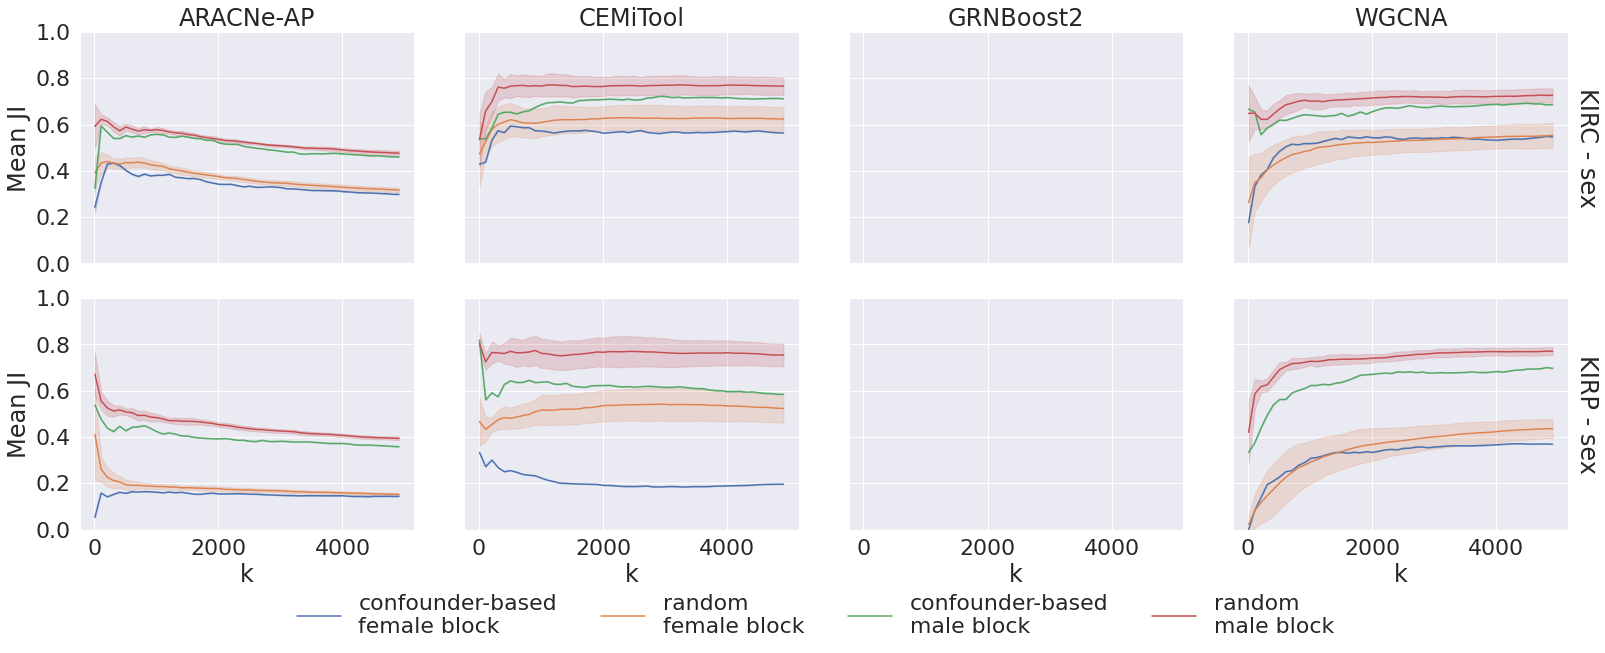

In [5]:
#plt.figure()
plt.tight_layout()
sns.set(font_scale=2)
sns.set_style('darkgrid')
g = sns.FacetGrid(JI, row='Cohort -\nConfounder', col='Method', hue='Block type', margin_titles=True, height=4.5,
                  ylim=(0,1), legend_out=False, col_order=['ARACNe-AP', 'CEMiTool', 'GRNBoost2', 'WGCNA'], aspect=1.3)
ax = g.axes[0,0]
g.map(sns.lineplot, "k", "Mean JI",errorbar='sd').add_legend()
sns.move_legend(ax, "lower center", frameon=False, bbox_to_anchor=(2.2,-1.7), title=None, ncols=4)
g.set_titles(row_template='{row_name}', col_template = '{col_name}')
plt.subplots_adjust(hspace=0.15, wspace=0.15)
#g.savefig('G_all_sex.pdf', bbox_inches='tight')